# Chapter 3: Getting Started with Neural Networks (DLWP Notes)

IMDB Reviews Dataset

In [40]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [18]:
word_index # mapping from word: index for each review

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [12]:
reverse_word_index = dict([(value, key) for key, value in word_index.items()])


In [13]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [14]:
decoded_review[:100]

"? this film was just brilliant casting location scenery story direction everyone's really suited the"

In [19]:
train_data.shape

(25000,)

In [27]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [30]:
import numpy as np

# vectorize words (convert the data into a tensor) to prepare for neural net
# this turns each review/datapoint into a vector of len 10,000, with the # occurances of 
    # each word w/ corresponding index.

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [35]:
X_train.shape

(25000, 10000)

In [38]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Now the data is ready for our neural net.

** First, let's cover hidden layers & activation functions.**

### Hidden Units

The input data is vectors, and the labels are scalars (1s and 0s)
* this is an easy group!

The networks that work the best on this setup is a simple stack of fully connected (*Dense*) layers with relu activations: `Dense(16, activation='relu')`
* 16 is the num. hidden units/nodes of the layer

**Hidden unit**: a dimension in the representation space of the layer

each dense layer with a relu activation implements the following operations

`output = relu(dot(W, input) + b)`

* `W` is the weight matrix
    * With 16 hidden units, the matrix `W` will have shape (input_dimension, 16)

### How many hidden units to use for a layer?

The more nodes used, the more 'freedom' you allow the model to have in learning internal representations

Use too many hidden units, and you risk overfitting (and vice-versa).

Formal principles for determining this number will be covered in Chapter 4. Until then, we'll trust Chollet with the choice of this architecture:
* two intermediate layers with 16 hidden units each
* a third layer that will output the scaler prediction regarding the sentiment of the current review

The intermediate layers will use `relu`, while the final layer will use a **sigmoid activation to output a probability** between 0 and 1, indicating how likely a sample is to have target = 1.

**Relu** is meant to zero out negative values

**Sigmoid** 'squashes' arbitrary values into the [0, 1] interval. This can be interpreted as a probability.

### Relu Activation

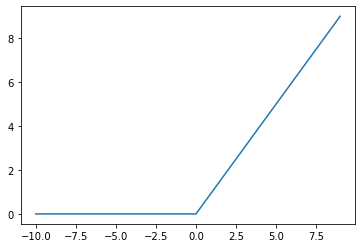

In [51]:
xs = np.arange(-10.0, 10.0, 1.0)

def relu(x):
    if x < 0:
        return 0
    return x

ys = [relu(x) for x in xs]

plt.plot(xs, ys) # relu function

### Sigmoid Activation

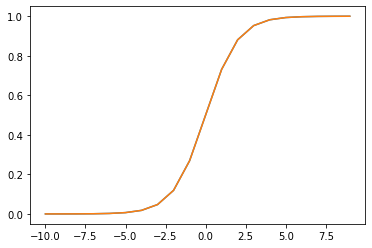

In [49]:
xs = np.arange(-10.0, 10.0, 1.0)

sigmoid = lambda x: 1 / (1 + np.e ** -x)

ys = [sigmoid(x) for x in xs]

plt.plot(xs, ys)

plt.plot(xs, ys) # relu function

In [52]:
from keras import models, layers

In [53]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Choosing a loss function

Loss function: we will use `binary-crossentropy`, since our model will output a probability.

**Crossentropy** measures the distance between probability distributions, or in this case, between ground-truth and the model predictions.

As a side note (to be covered later, I assume), we'll use the `rmsprop` optimizer. This is the go-to for all problems unless you have a specific reason not to use it.

In [59]:
# create validation set

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Compile and fit the model 

In [61]:
from keras import optimizers

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [64]:
history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3209 - acc: 0.9018 - val_loss: 0.3261 - val_acc: 0.8770
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2363 - acc: 0.9237 - val_loss: 0.3014 - val_acc: 0.8785
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1851 - acc: 0.9407 - val_loss: 0.2772 - val_acc: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1497 - acc: 0.9533 - val_loss: 0.2860 - val_acc: 0.8848
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1270 - acc: 0.9601 - val_loss: 0.3114 - val_acc: 0.8813
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1044 - acc: 0.9695 - val_loss: 0.3016 - val_acc: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0896 - acc: 0.9740 - val_loss: 0.3357 - val_acc: 0.8761
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0778 - a

In [70]:
history_dict = history.history
history_dict.keys() # to see results

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## Determining the number of epochs to use

Plot the epochs vs. loss metric & note where validation loss looks the optimal fit.

As you can see in the below graph, overfitting starts at 4 epochs. This tells us that with the current architecture and training set, we should only use 3 epochs.

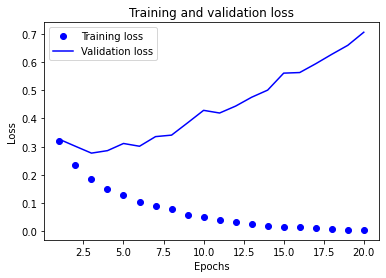

In [72]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [75]:
# restarting from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 9ms/step - loss: 0.5481 - accuracy: 0.7469
Epoch 2/3
49/49 [==============================] - 0s 9ms/step - loss: 0.2722 - accuracy: 0.9087
Epoch 3/3
782/782 [==============================] - 1s 719us/step - loss: 0.2848 - accuracy: 0.8854


In [76]:
results

[0.28476637601852417, 0.8853600025177002]

In [79]:
# can also use .predict()

model.predict(X_test)

array([[0.22856966],
       [0.9996745 ],
       [0.8152569 ],
       ...,
       [0.11847708],
       [0.10354924],
       [0.5821117 ]], dtype=float32)

In [82]:
X_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [83]:
X_test.shape

(25000, 10000)

# Major takeaways from the IMDB example

1. Lots of pre-processing steps often need to be done on the raw data before we can feed it as tensors into a neural network


2. Stacks of dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you'll likely use them frequently.


3. For binary classification problems, network should end with a **Dense** layer with **one unit** and a **sigmoid** activation function. 


4. With such a scalar output on a binary classification problem, the loss function should be binary_crossentropy


5. `rmsprop` is generally a good enough choice, no matter what the problem. One less thing to worry about.


6. As they get better on the training data, neurnets start overfitting at some point & start achieving increasingly worse results on the validation set. It's important to always monitor this.